In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [22]:
import gc

In [19]:
from scipy.io import loadmat

In [5]:
import tools as t

In [6]:
import glob

In [10]:
files = glob.glob('./data/*.mat')

In [27]:
selected_channels = t.SELECTED_CHANNELS

In [28]:
len(selected_channels)

183

In [17]:
files

['./data/headcast_subj01_sess07_MEG_data_cube.mat',
 './data/headcast_subj01_sess02_MEG_data_cube.mat',
 './data/headcast_subj01_sess04_MEG_data_cube.mat',
 './data/headcast_subj01_sess06_MEG_data_cube.mat',
 './data/headcast_subj01_sess03_MEG_data_cube.mat',
 './data/headcast_subj01_sess05_MEG_data_cube.mat',
 './data/headcast_subj01_sess01_MEG_data_cube.mat']

In [188]:
data, _, _, _, _ = t.load(files[0])

In [189]:
trial = data[14,:,0]

In [190]:
trial.shape

(2001,)

In [202]:
f = abs(np.fft.fftfreq(trial.shape[0]))


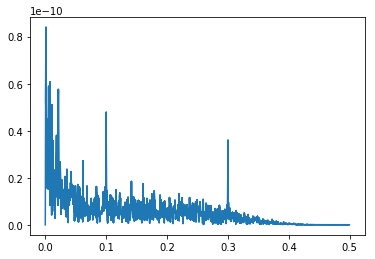

In [203]:
fft_trial = abs(np.fft.fft(trial))
plt.plot(f, fft_trial)

In [185]:
temp = np.zeros((6,9,10))

n_trials = 0
for file in files:
    print('processing: ' + file)
    print('n_trial: ' + str(n_trials))
    data, btn, auto, tAx, SR = t.load(files[0])
    mask = (tAx>=-1.5) & (tAx<=0)
    selected_data = data[t.MAG_CHANNELS, :, :]
    session_trials = selected_data.shape[2]
    for i in range(session_trials):
        imgs = t.freq_img(selected_data[:, :, i], window_mask=mask[0], plot=False)
        temp = temp + imgs
        n_trials+=1
temp = temp/n_trials


processing: ./data/headcast_subj01_sess07_MEG_data_cube.mat
n_trial: 0
processing: ./data/headcast_subj01_sess02_MEG_data_cube.mat
n_trial: 305
processing: ./data/headcast_subj01_sess04_MEG_data_cube.mat
n_trial: 610
processing: ./data/headcast_subj01_sess06_MEG_data_cube.mat
n_trial: 915
processing: ./data/headcast_subj01_sess03_MEG_data_cube.mat
n_trial: 1220
processing: ./data/headcast_subj01_sess05_MEG_data_cube.mat
n_trial: 1525
processing: ./data/headcast_subj01_sess01_MEG_data_cube.mat
n_trial: 1830


In [182]:
temp.shape

(6, 9, 10)

In [186]:
n_trials

2135

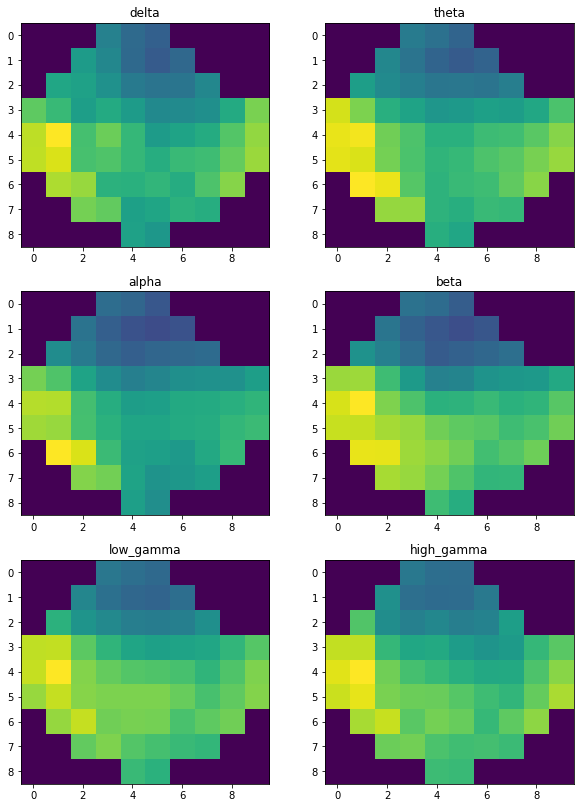

In [187]:
t.plot_freq_bands(temp)